# Natural Language Processing (NLP)

## Word Based Encodings

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = [
    'saya suka baca buku', #-> saya, suka, baca, buku -> 2,3,4,1 -> 2 3 4 1
    'dia membaca buku', #-> dia, membaca, buku
    'buku itu sedang dibaca olehnya' #-> buku, itu, sedang, dibaca, olehnya
]

tokenizer = Tokenizer(num_words = 100) #lebih banyak lebih baik
tokenizer.fit_on_texts(sentences) 
word_index = tokenizer.word_index
print(word_index)

{'buku': 1, 'saya': 2, 'suka': 3, 'baca': 4, 'dia': 5, 'membaca': 6, 'itu': 7, 'sedang': 8, 'dibaca': 9, 'olehnya': 10}


##Padding

In [2]:
import tensorflow as tf
from tensorflow import keras


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = [
    'saya suka baca buku',
    'dia membaca buku',
    'buku itu sedang dibaca olehnya'
]

tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>") #OOV = Out of Vocab
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

#Proses Padding
sequences = tokenizer.texts_to_sequences(sentences) #merubah kalimat menjadi susunan kata yang menjadi angka

padded = pad_sequences(sequences, maxlen=5) #merubah susunan kalimat menjadi susunan angka
print("\nWord Index = " , word_index)
print("\nSequences = " , sequences)
print("\nPadded Sequences:")
print(padded)


Word Index =  {'<OOV>': 1, 'buku': 2, 'saya': 3, 'suka': 4, 'baca': 5, 'dia': 6, 'membaca': 7, 'itu': 8, 'sedang': 9, 'dibaca': 10, 'olehnya': 11}

Sequences =  [[3, 4, 5, 2], [6, 7, 2], [2, 8, 9, 10, 11]]

Padded Sequences:
[[ 0  3  4  5  2]
 [ 0  0  6  7  2]
 [ 2  8  9 10 11]]


In [3]:
# Try with words that the tokenizer wasn't fit to
test_data = [
    'ayah membaca buku',
    'ayah suka kopi'
]

test_seq = tokenizer.texts_to_sequences(test_data)
print("\nTest Sequence = ", test_seq)

padded = pad_sequences(test_seq, maxlen=3)
print("\nPadded Test Sequence: ")
print(padded)


Test Sequence =  [[1, 7, 2], [1, 4, 1]]

Padded Test Sequence: 
[[1 7 2]
 [1 4 1]]


#Case Study - Mood Analysis

##Libraries

In [4]:
import re #Bisa untuk mengganti huruf
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Input Data

In [5]:
data = pd.read_csv('Data_Mood_Analysis.csv')
data.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [6]:
data.shape

(20000, 2)

##Examining Data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     20000 non-null  object
 1   Emotion  20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [8]:
data.describe(include='object')

,Text,Emotion
count,20000,20000
unique,19948,6
top,i will feel as though i am accepted by as well...,joy
freq,2,6761


##Target Class Balance

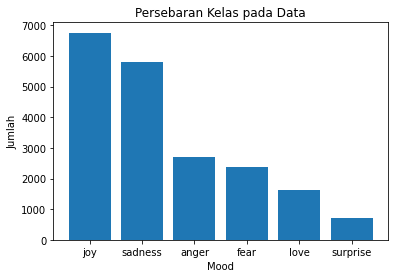


joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: Emotion, dtype: int64


In [9]:
plt.bar(data['Emotion'].unique(),height=data['Emotion'].value_counts())
plt.xticks(np.arange(6), data['Emotion'].value_counts().index)
plt.ylabel('Jumlah')
plt.xlabel('Mood')
plt.title("Persebaran Kelas pada Data")
plt.show()

print('')
print(data['Emotion'].value_counts())

##Cleaning Text

In [10]:
data['Text'][:10].values

array(['i didnt feel humiliated',
       'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
       'im grabbing a minute to post i feel greedy wrong',
       'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
       'i am feeling grouchy',
       'ive been feeling a little burdened lately wasnt sure why that was',
       'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
       'i feel as confused about life as a teenager or as jaded as a year old man',
       'i have been with petronas for years i feel that petronas has performed well and made a huge profit',
       'i feel romantic too'], dtype=object)

In [11]:
#Menghilangkan stopwords pada data
import nltk
from nltk.corpus import stopwords
import re

nltk.download('stopwords')

stop_words = stopwords.words('english')
cleaned_data = []

for i in range(len(data)):
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['Text']) #menghilangkan punctuation dan angka
  review = review.lower().split() #lowercase dan split

  review = [word for word in review if (word not in stop_words)] #melakukan stemming dan menghilangkan stopwords
  review = ' '.join(review) #digabungkan
    
  cleaned_data.append(review) #disimpan dalam variable cleaned_data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
data['Text'][:5].values

array(['i didnt feel humiliated',
       'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
       'im grabbing a minute to post i feel greedy wrong',
       'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
       'i am feeling grouchy'], dtype=object)

In [13]:
cleaned_data[:5]

['didnt feel humiliated',
 'go feeling hopeless damned hopeful around someone cares awake',
 'im grabbing minute post feel greedy wrong',
 'ever feeling nostalgic fireplace know still property',
 'feeling grouchy']

In [14]:
data2 = data.copy()
data2['Text'] = cleaned_data
data2.head()

,Text,Emotion
0,didnt feel humiliated,sadness
1,go feeling hopeless damned hopeful around some...,sadness
2,im grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still pr...,love
4,feeling grouchy,anger


##Wordcloud

In [15]:
df_grouped = data2.groupby(by='Emotion').agg(lambda x:' '.join(x))
df_grouped.head()

,Text
Emotion,
anger,im grabbing minute post feel greedy wrong feel...
fear,feel confused life teenager jaded year old man...
joy,petronas years feel petronas performed well ma...
love,ever feeling nostalgic fireplace know still pr...
sadness,didnt feel humiliated go feeling hopeless damn...


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(analyzer='word')
data = cv.fit_transform(df_grouped['Text'])

df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index = df_grouped.index
df_dtm.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaaaaaand,aaaaand,aaaah,aaaand,aac,aahhh,aaron,ab,abandon,...,zonisamide,zoo,zoom,zooming,zooms,zq,zucchini,zum,zumba,zz
Emotion,,,,,,,,,,,,,,,,,,,,,
anger,1,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
fear,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
joy,0,1,0,1,1,0,0,0,1,1,...,1,1,0,2,0,0,1,0,2,0
love,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
sadness,1,0,1,0,0,0,0,0,0,1,...,0,0,2,0,1,0,0,1,0,1


In [30]:
df_dtm.describe()

Emotion,anger,fear,joy,love,sadness,surprise
count,16929.000000,16929.000000,16929.000000,16929.000000,16929.000000,16929.000000
mean,1.492823,1.282946,3.775415,0.962195,3.091382,0.407998
std,17.443613,15.025787,44.880801,11.228345,38.233642,4.840478
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000
max,1796.000000,1479.000000,4942.000000,1180.000000,4079.000000,462.000000


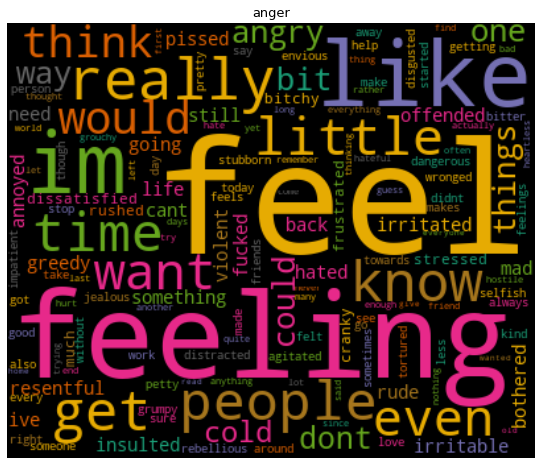

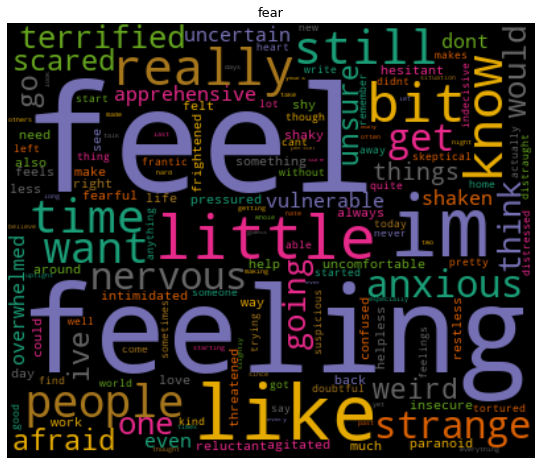

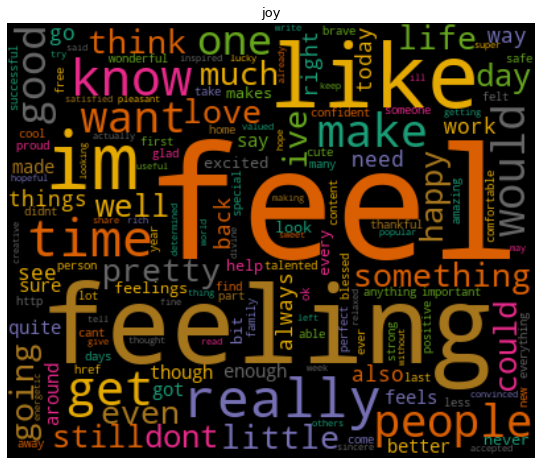

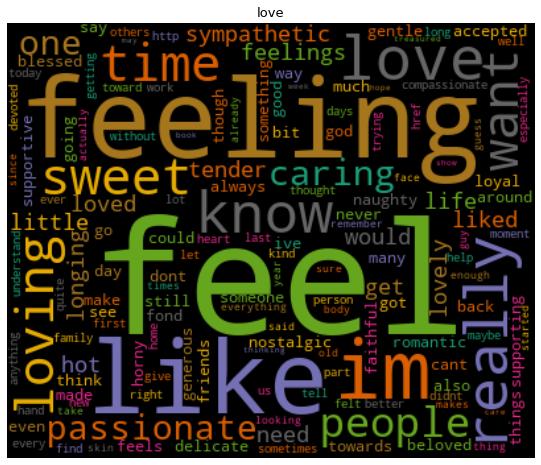

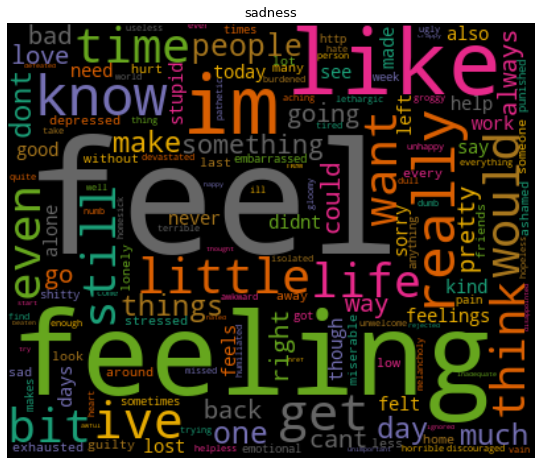

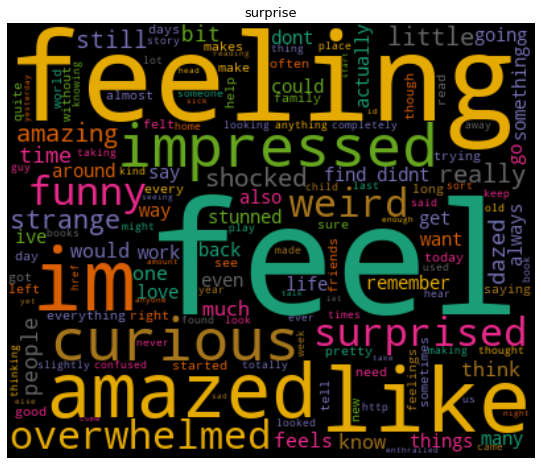

In [17]:
from wordcloud import WordCloud
from textwrap import wrap

def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)

  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index, rating in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[rating].sort_values(ascending=False), rating)

##Feature and Label Splitting

In [19]:
X = data2[['Text']]
X.head()

,Text
0,didnt feel humiliated
1,go feeling hopeless damned hopeful around some...
2,im grabbing minute post feel greedy wrong
3,ever feeling nostalgic fireplace know still pr...
4,feeling grouchy


In [20]:
y = data2[['Emotion']]
y.head()

,Emotion
0,sadness
1,sadness
2,anger
3,love
4,anger


##Label Encoder

In [21]:
from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder().fit(y)

y = label_encode.transform(y)
y[:5]

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([4, 4, 0, 3, 0])

In [22]:
for i in range(len(label_encode.classes_)):
  print(i,'->',label_encode.classes_[i])

0 -> anger
1 -> fear
2 -> joy
3 -> love
4 -> sadness
5 -> surprise


##Data Splitting

In [23]:
from sklearn.model_selection import train_test_split
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

# lets print the shapes again 
print("Shape of the x Train :", X_train.shape)
print("Shape of the y Train :", Counter(y_train))
print("Shape of the x Valid :", X_test.shape)
print("Shape of the y Valid :", Counter(y_test))

Shape of the x Train : (18000, 1)
Shape of the y Train : Counter({2: 6077, 4: 5230, 0: 2437, 1: 2131, 3: 1472, 5: 653})
Shape of the x Valid : (2000, 1)
Shape of the y Valid : Counter({2: 684, 4: 567, 0: 272, 1: 242, 3: 169, 5: 66})


##Processing Data

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 5000
embedding_dim = 16
max_length = 128
trunc_type ='pre'
padding_type ='post'
oov_tok = '<OOV>'

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok) #membuat tokenizer
tokenizer.fit_on_texts(X_train['Text']) #mengambil kosakata di kalimat data training
word_index = tokenizer.word_index #mengambil word index
sequences = tokenizer.texts_to_sequences(X_train['Text']) #mengubah kalimat menjadi susunan kata berdasarkan word index
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type) #mengubah susunan kata menjadi urutan kata

testing_sequences = tokenizer.texts_to_sequences(X_test['Text']) #untuk data testing
testing_padded = pad_sequences(testing_sequences,maxlen=max_length) #untuk data testing

In [25]:
padded[3]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    3,  400,  470,
        131,   28, 1889, 3147,    1,  720, 1890], dtype=int32)

In [26]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[3]))
print(X_train.values[3])

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? feeling wonder dangerous place could settled mentality <OOV> bring possibility
['feeling wonder dangerous place could settled mentality enmayi bring possibility']


##Model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

model = Sequential()
model.add(Embedding(vocab_size,embedding_dim, input_length=max_length))
model.add(Bidirectional(LSTM(128, dropout=0.2,recurrent_dropout=0.2)))
model.add(Dense(6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 128, 16)           80000     
                                                                 
 bidirectional (Bidirectiona  (None, 256)              148480    
 l)                                                              
                                                                 
 dense (Dense)               (None, 6)                 1542      
                                                                 
Total params: 230,022
Trainable params: 230,022
Non-trainable params: 0
_________________________________________________________________


In [28]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(
    monitor="val_loss",
    patience=2,
    restore_best_weights=True,
)

In [29]:
history = model.fit(padded,
                    y_train,
                    validation_split=0.1,
                    batch_size=256,
                    epochs=10,
                    callbacks=[callback]
                   )

Epoch 1/10
64/64 [==============================] - 129s 2s/step - loss: 1.6169 - accuracy: 0.3122 - val_loss: 1.5782 - val_accuracy: 0.3883
Epoch 2/10
64/64 [==============================] - 121s 2s/step - loss: 1.5103 - accuracy: 0.3856 - val_loss: 1.4831 - val_accuracy: 0.3833
Epoch 3/10
64/64 [==============================] - 120s 2s/step - loss: 1.2211 - accuracy: 0.5528 - val_loss: 0.9898 - val_accuracy: 0.6678
Epoch 4/10
64/64 [==============================] - 120s 2s/step - loss: 0.7663 - accuracy: 0.7325 - val_loss: 0.7514 - val_accuracy: 0.7461
Epoch 5/10
64/64 [==============================] - 140s 2s/step - loss: 0.5996 - accuracy: 0.7880 - val_loss: 0.6660 - val_accuracy: 0.7650
Epoch 6/10
64/64 [==============================] - 121s 2s/step - loss: 0.4748 - accuracy: 0.8467 - val_loss: 0.5778 - val_accuracy: 0.8200
Epoch 7/10
64/64 [==============================] - 122s 2s/step - loss: 0.3663 - accuracy: 0.8799 - val_loss: 0.4908 - val_accuracy: 0.8428
Epoch 8/10
64

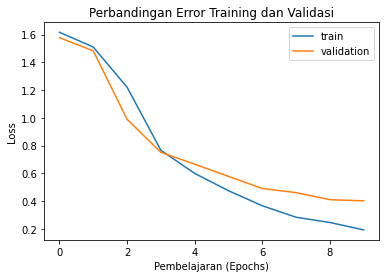

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Perbandingan Error Training dan Validasi')
plt.ylabel('Loss')
plt.xlabel('Pembelajaran (Epochs)')
plt.legend()
plt.show()

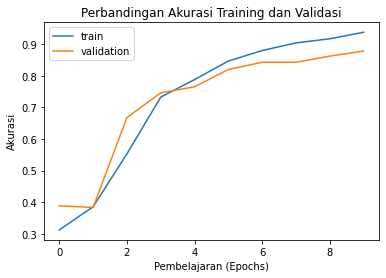

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Perbandingan Akurasi Training dan Validasi')
plt.ylabel('Akurasi')
plt.xlabel('Pembelajaran (Epochs)')
plt.legend()
plt.show()

In [33]:
y_dnn = model.predict(testing_padded)
y_dnn[0]

array([1.5077447e-07, 1.4982980e-06, 1.4745241e-05, 1.3746676e-10,
       9.9998355e-01, 1.1842263e-10], dtype=float32)

In [34]:
label_encode.classes_

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
      dtype=object)

In [35]:
print(np.argmax(y_dnn[0]))
print(y_test[0])

4
4


In [36]:
y_dnnfinal = np.argmax(y_dnn, axis=1)
y_dnnfinal[:5]

array([4, 2, 0, 3, 2])

In [37]:
from sklearn.metrics import accuracy_score

dnn_acc = accuracy_score(y_test, y_dnnfinal) * 100
print('{:.2f}%'.format(dnn_acc))

89.75%


In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_dnnfinal))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       272
           1       0.93      0.87      0.90       242
           2       0.89      0.95      0.92       684
           3       0.77      0.72      0.74       169
           4       0.93      0.96      0.94       567
           5       0.86      0.55      0.67        66

    accuracy                           0.90      2000
   macro avg       0.88      0.82      0.84      2000
weighted avg       0.90      0.90      0.90      2000



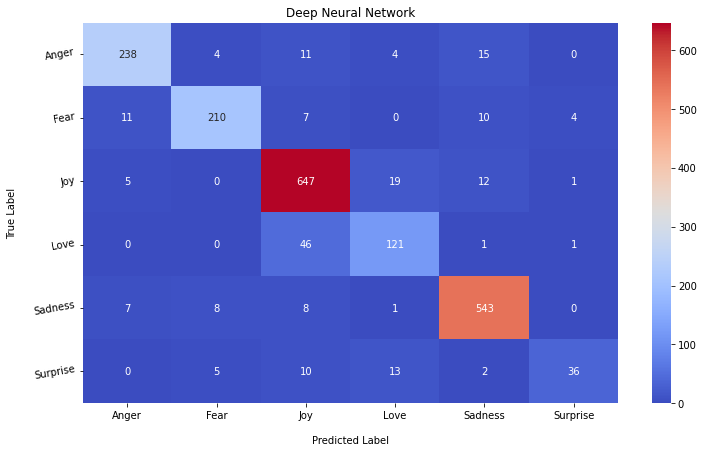

In [39]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12,7))
sns.heatmap(confusion_matrix(y_test, y_dnnfinal)
            ,annot=True,cmap='coolwarm',fmt='g')
plt.ylabel('True Label\n')
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5], ['Anger','Fear','Joy','Love','Sadness','Surprise'],rotation=10)
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5], ['Anger','Fear','Joy','Love','Sadness','Surprise'])
plt.xlabel('\nPredicted Label')
plt.title('Deep Neural Network')
plt.show()

##Real Time Prediction

In [40]:
# Classify custom sample

sentences = [
            "He's over the moon about being accepted to the university",
            "I'm so angry with my boss",
            "I can't do it, I'm not ready to lose anything, just leave me alone",
            "Merlin's beard harry, you can cast the Patronus charm! I'm amazed!"
            ]
for sentence in sentences:
    print(sentence)

    sentence = re.sub('[^a-zA-Z]', ' ', sentence) #menghilangkan punctuation dan angka
    sentence = sentence.lower().split() #lowercase dan split

    sentence = [word for word in sentence if (word not in stop_words)] #melakukan stemming dan menghilangkan stopwords
    sentence = ' '.join(sentence) #digabungkan

    sentence = tokenizer.texts_to_sequences([sentence])
    sentence = pad_sequences(sentence, maxlen=max_length, truncating=trunc_type)
    result = label_encode.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
    proba =  np.max(model.predict(sentence))

    print('{} : {:.2f}%'.format(result, proba*100))
    print('')

He's over the moon about being accepted to the university
joy : 68.51%

I'm so angry with my boss
anger : 93.86%

I can't do it, I'm not ready to lose anything, just leave me alone
sadness : 71.43%

Merlin's beard harry, you can cast the Patronus charm! I'm amazed!
surprise : 63.95%



##Export Model DNN

In [41]:
model.save("Model Mood Analysis.h5")

In [42]:
new_model= tf.keras.models.load_model(filepath='/content/Model Mood Analysis.h5')

In [43]:
for sentence in sentences:
    print(sentence)

    sentence = re.sub('[^a-zA-Z]', ' ', sentence) #menghilangkan punctuation dan angka
    sentence = sentence.lower().split() #lowercase dan split

    sentence = [word for word in sentence if (word not in stop_words)] #melakukan stemming dan menghilangkan stopwords
    sentence = ' '.join(sentence) #digabungkan

    sentence = tokenizer.texts_to_sequences([sentence])
    sentence = pad_sequences(sentence, maxlen=max_length, truncating=trunc_type)
    result = label_encode.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
    proba =  np.max(new_model.predict(sentence))

    print('{} : {:.2f}%'.format(result, proba*100))
    print('')

He's over the moon about being accepted to the university
joy : 68.51%

I'm so angry with my boss
anger : 93.86%

I can't do it, I'm not ready to lose anything, just leave me alone
sadness : 71.43%

Merlin's beard harry, you can cast the Patronus charm! I'm amazed!
surprise : 63.95%

